#### Importing packages

In [1]:
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
import matplotlib
import matplotlib.pyplot as plt

#### Loading data

In [2]:
z_cohdd = np.load('z_cohdd.npy')#transposed coherently dedispersed data
print(z_cohdd.shape)

(1024, 2, 195311)


#### Removing RFI

In [3]:
polx = z_cohdd[:,0,:]
poly = z_cohdd[:,1,:]
Iraw = np.real(polx)**2 + np.imag(polx)**2 + np.real(poly)**2 + np.imag(poly)**2

for i in range(1024):
    Iraw[i,:] -= np.nanmedian(Iraw[i,:])
    Iraw[i,:] /= np.nanstd(Iraw[i,:])
    Iraw[i,:] -= np.nanmean(Iraw[i,:])

#### Function to rebin data

In [4]:
def rebin(matrix, xbin, ybin):

    shape1=matrix.shape[0]//xbin
    shape2=matrix.shape[1]//ybin
    return np.nanmean(np.reshape(matrix[:shape1*xbin,:shape2*ybin],(shape1,xbin,shape2,ybin)),axis=(1,3))

#### Plot style

In [5]:
font = {'family' : 'Times',
        'size'   : 20}

matplotlib.rc('font', **font)

#### General plot parameters

In [19]:
ref = 4 # rebinning how many freq channels to one freq chan
ret = 10 # for time

rebin_I = rebin(Iraw,ref,ret)
rebin_I_mt = np.nanmean(rebin_I,axis=0)

t_arr = 2.56*1e-3*ret*np.arange(rebin_I.shape[1])
f_arr = 800-400*np.arange(rebin_I.shape[0])/rebin_I.shape[0]

vmax = np.nanmean(rebin_I)+4*np.nanstd(rebin_I)
vmin = np.nanmean(rebin_I)-2*np.nanstd(rebin_I)

#### Plotting time-series

/scinet/niagara/software/2018a/opt/base/anaconda3/5.1.0-hub/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['Times'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


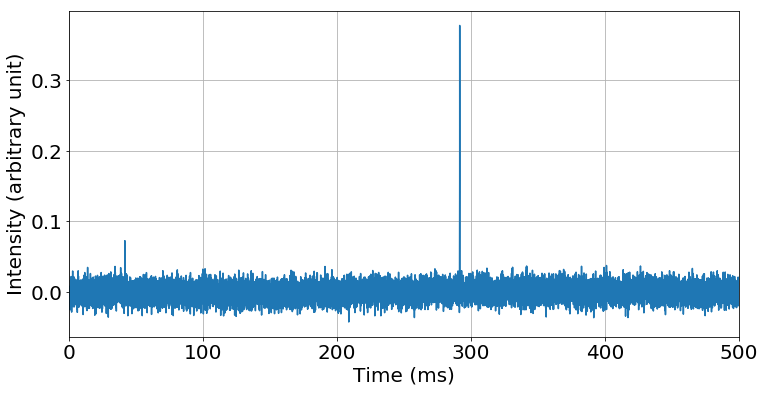

In [14]:
plt.figure(figsize=(12,6))
plt.plot(t_arr,rebin_I_mt)
plt.xlabel('Time (ms)')
plt.ylabel('Intensity (arbitrary unit)')
plt.xlim(0,t_arr.max())
plt.grid(True)
#plt.savefig("timeseries.pdf")
plt.show()

#### Plotting waterfall large width

/scinet/niagara/software/2018a/opt/base/anaconda3/5.1.0-hub/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['Times'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


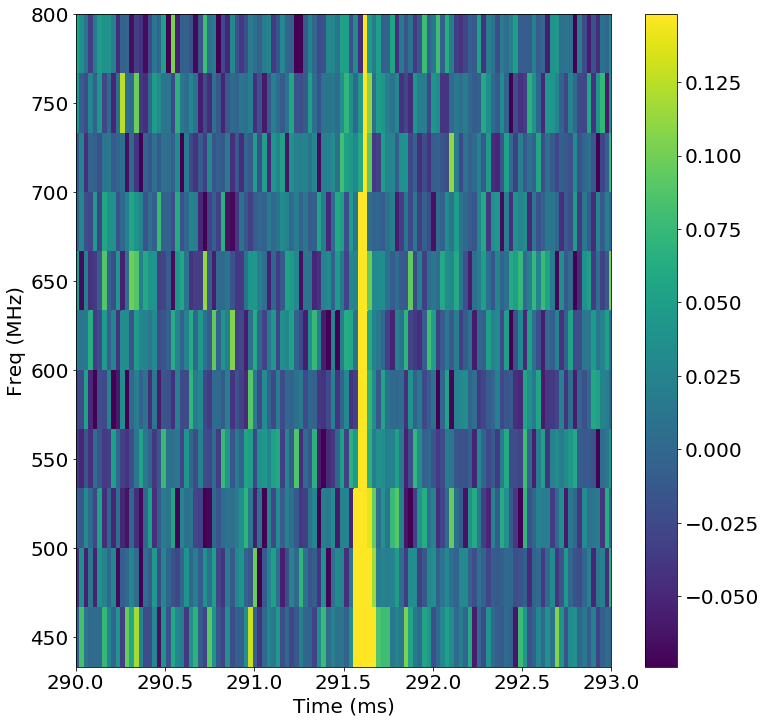

In [20]:
plt.figure(figsize=(12,12))
plt.pcolormesh(t_arr, f_arr, rebin_I, vmax=vmax, vmin=vmin)
plt.xlabel('Time (ms)')
plt.ylabel('Freq (MHz)')
plt.xlim(290,293)
plt.colorbar()
#plt.savefig("wf_3ms.pdf")
plt.show()

#### Plotting waterfall small width

/scinet/niagara/software/2018a/opt/base/anaconda3/5.1.0-hub/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['Times'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


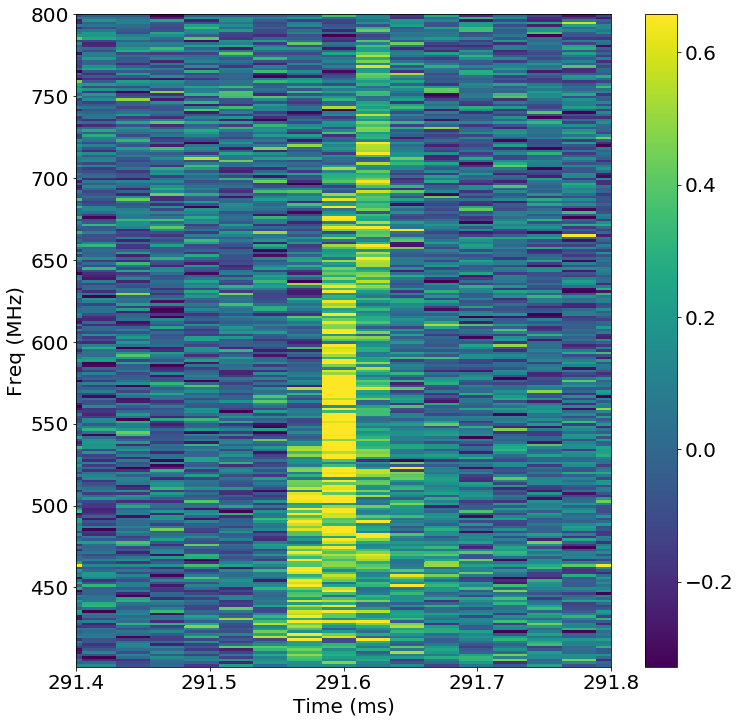

In [11]:
plt.figure(figsize=(12,12))
plt.pcolormesh(t_arr, f_arr, rebin_I, vmax=vmax, vmin=vmin)
plt.xlabel('Time (ms)')
plt.ylabel('Freq (MHz)')
plt.xlim(291.4,291.8)
plt.colorbar()
#plt.savefig("wf_0.4ms.pdf")
plt.show()